In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
gdp_df_clean = gdp_df.drop('Value Footnotes', axis=1)

In [5]:
gdp_df_clean.columns =['Country', 'Year', 'GDP_Per_Capita']

7. How many countries have data for all years? 
Which countries are missing many years of data? 
Look at the number of observations per year. What do you notice? 

In [6]:
gdp_df_year_count = gdp_df_clean.groupby('Country').nunique('Year')

In [7]:
gdp_df_year_count

,Year,GDP_Per_Capita
Country,,
Afghanistan,20,20
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
...,...,...
Viet Nam,33,33
West Bank and Gaza,29,29
World,33,33


In [8]:
gdp_df_year_count.value_counts('Year')

Year
33    202
28     10
32      5
23      4
31      3
22      3
29      2
26      2
10      2
12      1
25      1
20      1
19      1
16      1
30      1
15      1
14      1
24      1
Name: count, dtype: int64

In [9]:
gdp_df_year_count[gdp_df_year_count['Year'] == 33]

,Year,GDP_Per_Capita
Country,,
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
Angola,33,33
...,...,...
Vanuatu,33,33
Viet Nam,33,33
World,33,33


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [10]:
gdp_df_2020 = gdp_df_clean[gdp_df_clean['Year'] == 2020]

In [11]:
gdp_df_2020.drop('Year', axis =1)

,Country,GDP_Per_Capita
1,Afghanistan,1968.341002
22,Africa Eastern and Southern,3455.023119
55,Africa Western and Central,3957.933804
88,Albania,13278.369769
121,Algeria,10844.770764
...,...,...
7503,Viet Nam,10450.622382
7536,West Bank and Gaza,5402.538773
7565,World,16204.169107
7598,Zambia,3183.650773


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

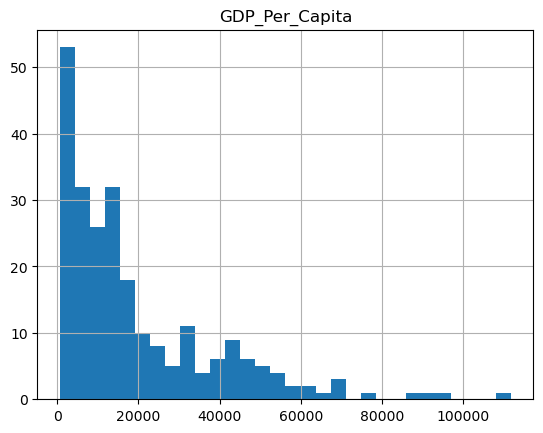

In [12]:
gdp_df_2020.hist('GDP_Per_Capita', bins = 30)

(array([111.,  60.,  24.,  19.,  15.,   5.,   4.,   1.,   2.,   1.]),
 array([   711.35526342,  11815.35121222,  22919.34716101,  34023.3431098 ,
         45127.3390586 ,  56231.33500739,  67335.33095619,  78439.32690498,
         89543.32285377, 100647.31880257, 111751.31475136]),
 <BarContainer object of 10 artists>)

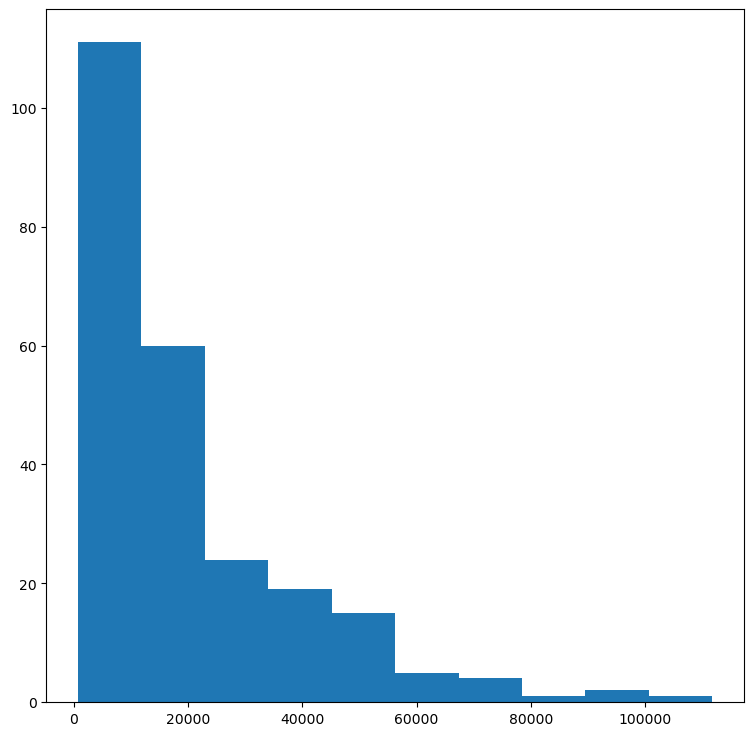

In [13]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.hist(gdp_df_2020['GDP_Per_Capita'])

##first line sets up the graphy itself, the second line plots it and gives its contents.

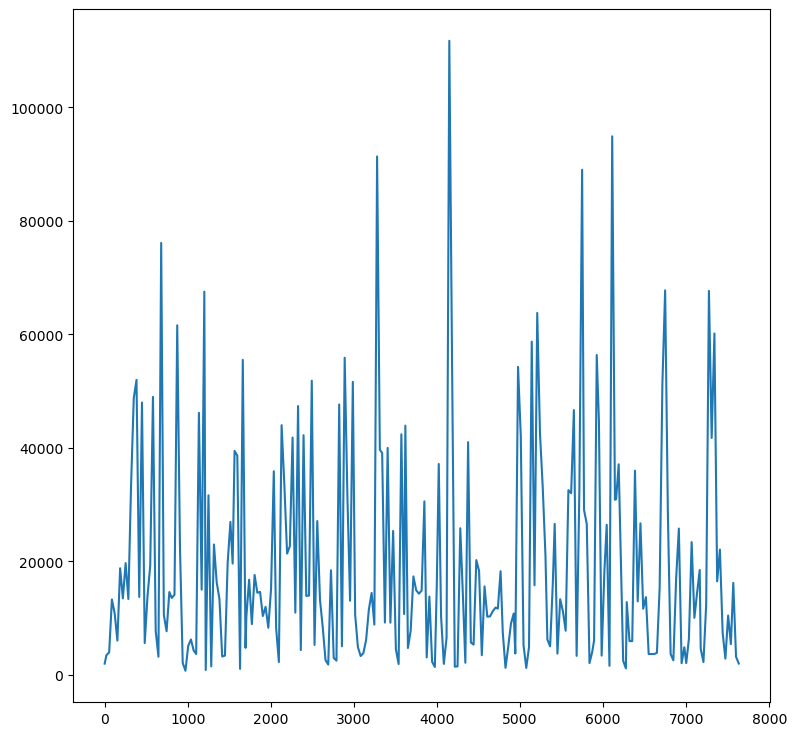

In [14]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.plot(gdp_df_2020['GDP_Per_Capita'])

{'whiskers': [<matplotlib.lines.Line2D at 0x13aafd710>,
 'caps': [<matplotlib.lines.Line2D at 0x13aafef10>,
 'boxes': [<matplotlib.lines.Line2D at 0x13a98d010>],
 'medians': [<matplotlib.lines.Line2D at 0x13ab084d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13ab08a10>],
 'means': []}

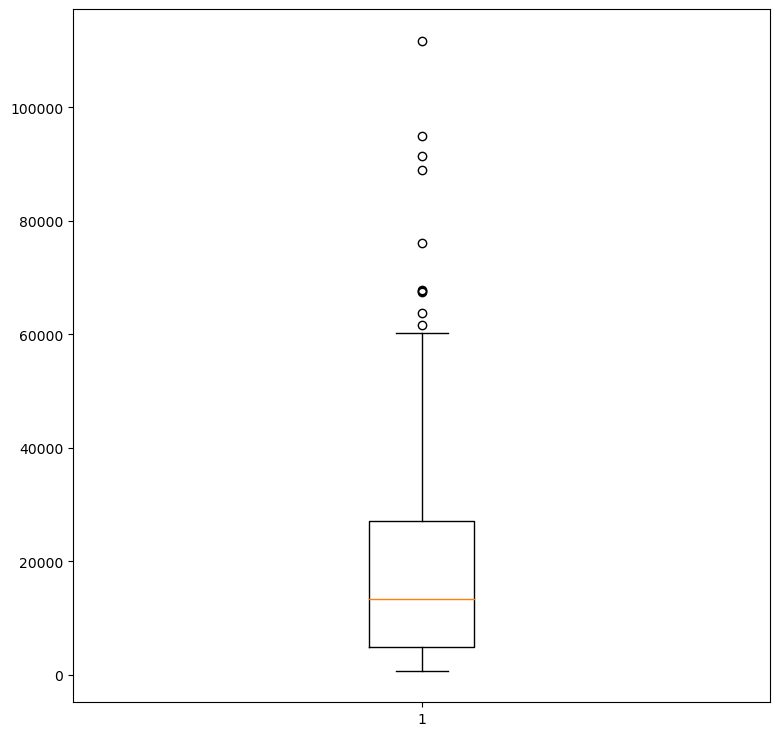

In [15]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.boxplot(gdp_df_2020['GDP_Per_Capita'])

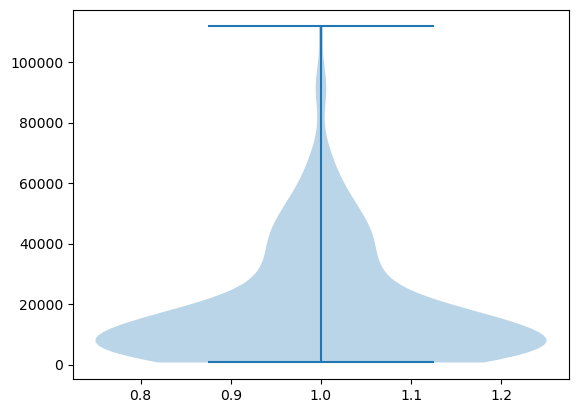

In [16]:
fig, ax = plt.subplots()
vp = ax.violinplot(gdp_df_2020['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [17]:
gdp_df_2020.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2020.0,19586.754446
std,0.0,19640.401631
min,2020.0,711.355263
25%,2020.0,4961.408532
50%,2020.0,13357.997573
75%,2020.0,27064.125293
max,2020.0,111751.314751


10. 
    For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [18]:
gdp_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [19]:
gdp_df_10 = gdp_df_clean[gdp_df_clean["Year"].isin ([1990, 2000, 2010, 2020])]

In [20]:
#gdp_df_clean[gdp_df_clean['Year'] == 2020]

In [21]:
gdp_df_10.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


{'whiskers': [<matplotlib.lines.Line2D at 0x13abe8b90>,
 'caps': [<matplotlib.lines.Line2D at 0x13abea190>,
 'boxes': [<matplotlib.lines.Line2D at 0x13abd7e90>],
 'medians': [<matplotlib.lines.Line2D at 0x13abeb490>],
 'fliers': [<matplotlib.lines.Line2D at 0x13abb8c50>],
 'means': []}

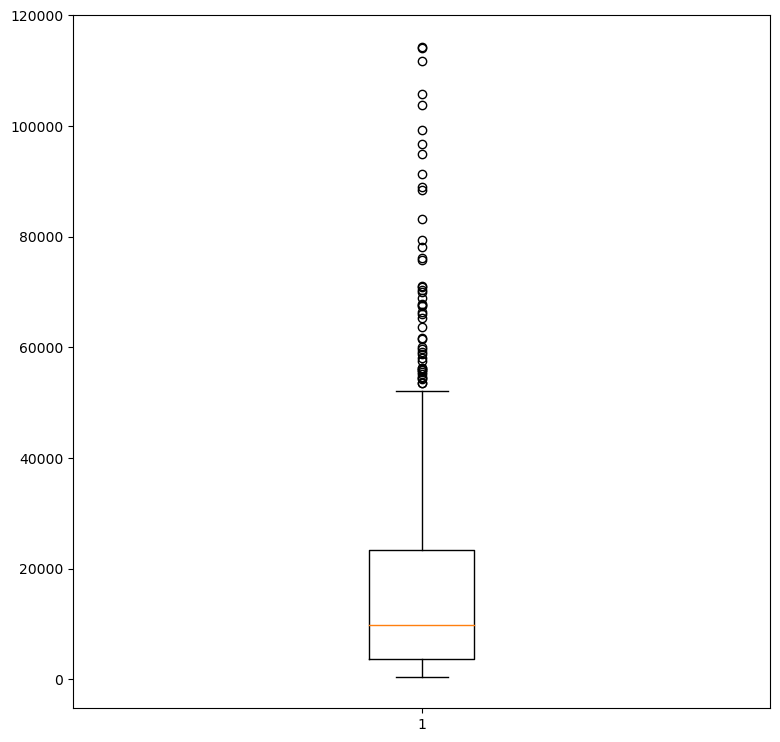

In [22]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.boxplot(gdp_df_10['GDP_Per_Capita'])

<BarContainer object of 921 artists>

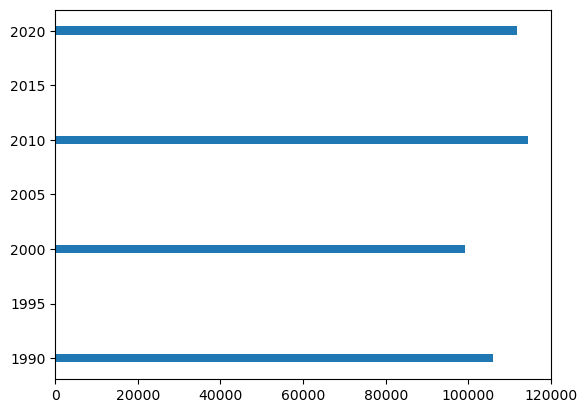

In [23]:
plt.barh(y=gdp_df_10.Year, width=gdp_df_10.GDP_Per_Capita)

In [24]:
int_use = pd.read_csv('../data/internet_use.csv', nrows = 6084)

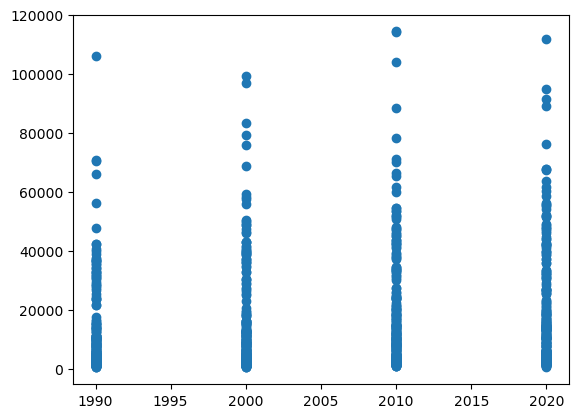

In [25]:
plt.scatter(x=gdp_df_10['Year'], y=gdp_df_10['GDP_Per_Capita'])

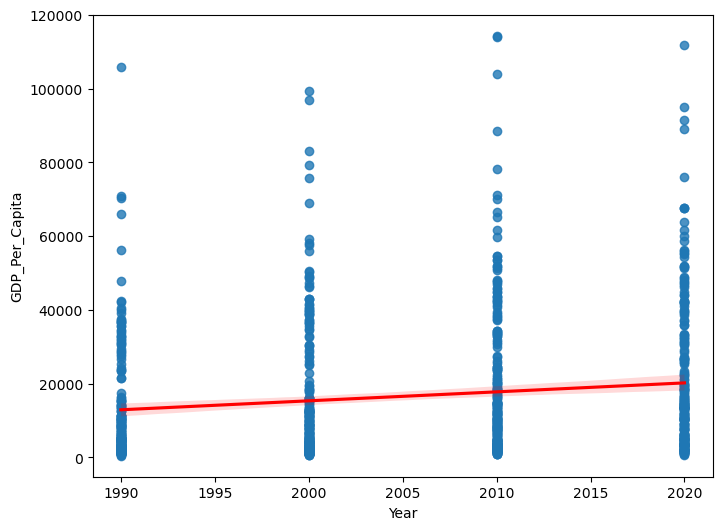

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_df_10["Year"],
    y=gdp_df_10["GDP_Per_Capita"],
    line_kws={"color": "r"},
    ax=ax
)
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [27]:
gdp_df_clean.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [28]:
gdp_year = gdp_df_clean.sort_values('Year')

In [29]:
gdp_year[gdp_year.GDP_Per_Capita > 100000].iloc[0]

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           105893.626059
Name: 7302, dtype: object

In [30]:
## used iloc to locate the first (o) time GDP_Per_Capita > 100000.

12. Which country had the highest GDP per capita in 2020? 
Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [31]:
gdp_df_2020.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764


In [32]:
gdp_df_2020['GDP_Per_Capita'].max()

111751.3147513618

In [33]:
my_value = 111751.3147513618
results = gdp_df_2020.loc[gdp_df_2020["GDP_Per_Capita"] == my_value]
results.head()

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [34]:
gdp_df_2020.loc[gdp_df_2020.GDP_Per_Capita == gdp_df_2020['GDP_Per_Capita'].max()]['Country']

4148    Luxembourg
Name: Country, dtype: object

In [35]:
gdp_df_2020.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


In [36]:
## 3 diffrent ways to get the same result above.

In [37]:
gdp_df_lux = gdp_df_clean[gdp_df_clean['Country'] == 'Luxembourg']

<Axes: xlabel='Year'>

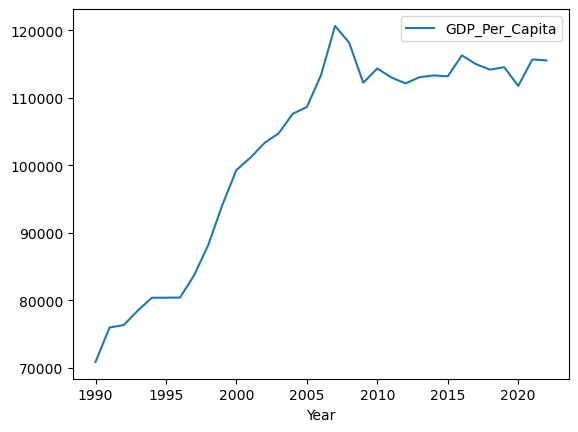

In [38]:
gdp_df_lux.plot('Year')

13. Which country had the lowest GDP per capita in 2020? 
Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 
    Which countries had lower GDP per capita in 2020 than in 1990?

In [39]:
gdp_df_2020.sort_values(by = 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


In [40]:
gdp_df_bru = gdp_df_clean[gdp_df_clean['Country'] == 'Burundi']

<Axes: xlabel='Year'>

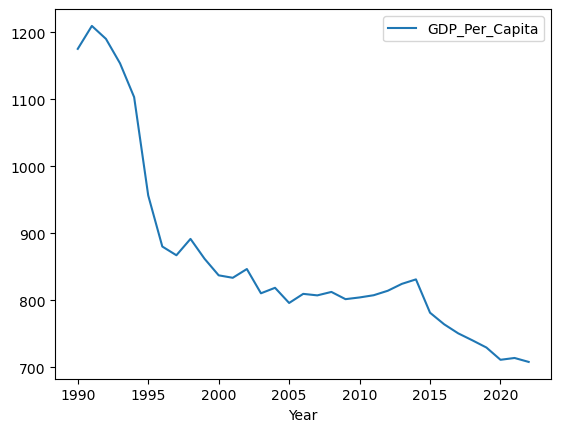

In [41]:
gdp_df_bru.plot('Year')

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [42]:
int_use = pd.read_csv('../data/internet_use.csv', nrows = 6084)

In [43]:
int_use.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [44]:
int_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6084 non-null   object 
 1   Year             6084 non-null   object 
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), object(3)
memory usage: 190.3+ KB


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [45]:
int_use = int_use.drop('Value Footnotes', axis=1)
int_use.columns =['Country', 'Year', 'Internet_Users_Pct']

In [46]:
int_use.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


16. Look at the number of observations in this dataset per year. What do you notice?

In [47]:
int_use['Year'].value_counts()

Year
1990        226
2007        217
2011        214
2008        214
2009        214
2002        214
2006        212
2001        212
2005        212
2004        210
2000        210
2010        209
2012        209
2003        208
1999        207
2016        206
2017        205
2014        204
2015        203
2013        203
1998        195
1997        188
2021        186
2020        186
2019        185
2022        184
1996        177
2018        174
1995        141
1994         92
1993         66
1992         50
1991         39
2023         11
Footnote      1
Name: count, dtype: int64

In [48]:
## 2023, 1991,1992,1993,1994 all are much lower.

17. What is the first year to have a non-zero internet users percentage value?

In [61]:
int_use = int_use[int_use['Internet_Users_Pct'] > 0]

##.sort_values(by = 'Year')

In [62]:
int_use.head()

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369


In [63]:
int_use.sort_values(by = 'Year')

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2001,Finland,1990,0.401088
5150,Spain,1990,0.012874
1010,Canada,1990,0.361000
5332,Switzerland,1990,0.595714
...,...,...,...
3141,Latvia,2023,92.187900
3323,Luxembourg,2023,99.347900
1537,Denmark,2023,98.775600
340,Azerbaijan,2023,88.000000


18. How does the distribution of internet users percent differ for 2000 and 2014?